# SNIP algorithm and example usage

The SNIP algorithm is often used for the background estimationof Raman spectra.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
plt.style.use('ggplot')

## Data

Create dataframe from example csv:

In [27]:
df = pd.read_csv('SP_27.csv', header=None)
df.columns = ['raman_shift', 'intensity']
df.head()

,raman_shift,intensity
0,-229.942688,-46.0
1,-227.369095,-41.0
2,-224.796661,-31.0
3,-222.225418,-61.0
4,-219.655334,-72.0


Plot the whole Raman spectrum of the csv:

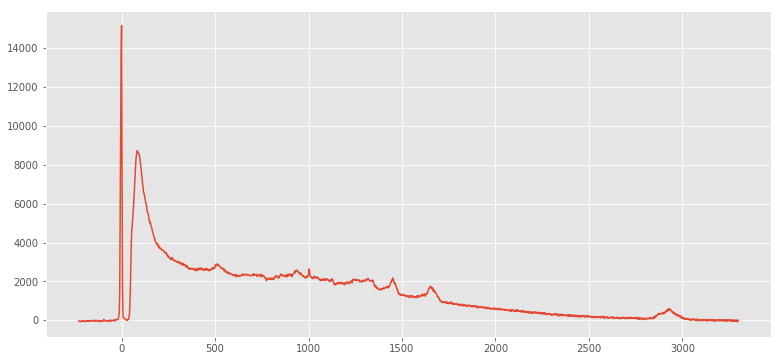

In [28]:
fig = plt.figure(figsize=(13, 6))

plt.plot(df.raman_shift, df.intensity)

plt.show()

Select a subregion of the spectrum:

In [29]:
df1 = df[250:1000]
df1.head()

,raman_shift,intensity
250,378.793457,2649.0
251,381.095428,2677.0
252,383.396362,2628.0
253,385.696289,2625.0
254,387.995209,2608.0


Plot the subregion:

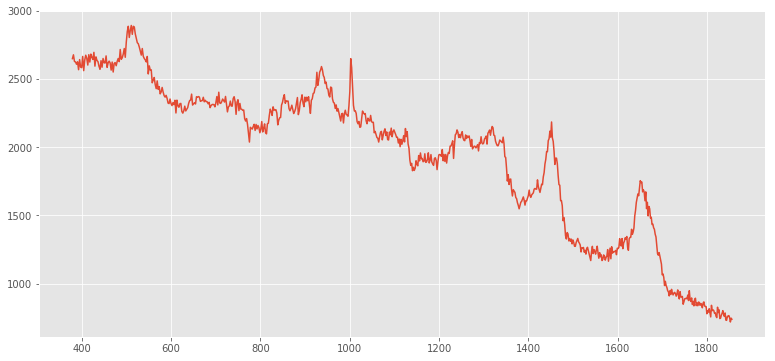

In [30]:
fig = plt.figure(figsize=(13, 6))

plt.plot(df1.raman_shift, df1.intensity)

plt.show()

## SNIP algorithm

The following function contains the implemantation of the SNIP algorithm for both increasing and decreasing iteration window.

In [86]:
def snip(data, iterations, increasing=False):
    """SNIP implementation for 1-D data based on the M. Morhac algorithm [1].

    [1] Morháč M, Kliman J, Matoušek V, Veselský M, Turzo I. Background
    elimination methods for multidimensional coincidence γ-ray spectra. Nuclear
    Instruments and Methods in Physics Research Section A: Accelerators,
    Spectrometers, Detectors and Associated Equipment. 1997 Dec 11;401(1):113-
    32.

    Arguments:
        data {numpy.ndarray} -- Data for which the background is to be
        estimated using the SNIP algorithm.

        iterations {int} -- Number of iterations for the SNIP algorithm.

    Keyword Arguments:
        increasing {bool} -- Implementation of the SNIP algorithm using
        increasing or decreasing iteration window. (default: {False})

    Returns:
        numpy.ndarray -- SNIP-calculated background.
    """

    N = len(data)
    v = data.copy()  # use copy of data so the original remain intact
    w = np.empty(N)  # working vector

    def snip_increasing(data, iterations):

        p = 1
        while p <= iterations:

            i = p
            while i < N - p:
                a1 = v[i]
                a2 = (v[i - p] + v[i + p]) / 2
                w[i] = min(a1, a2)
                i += 1
                
            j = p
            while j < N - p:
                v[j] = w[j]
                j += 1

            p += 1

        return v

    def snip_decreasing(data, iterations):

        p = iterations
        while p > 0:

            i = p
            while i < N - p:
                a1 = v[i]
                a2 = (v[i - p] + v[i + p]) / 2
                w[i] = min(a1, a2)
                i += 1

            j = p
            while j < N - p:
                v[j] = w[j]
                j += 1

            p -= 1

        return v

    if increasing is True:
        return snip_increasing(data, iterations)
    elif increasing is False:
        return snip_decreasing(data, iterations)


In [95]:
bg = snip(df1.intensity.values, 15)

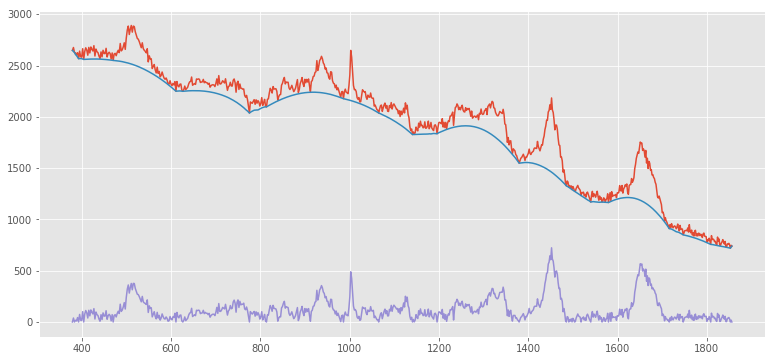

In [97]:
fig = plt.figure(figsize=(13, 6))

plt.plot(df1.raman_shift, df1.intensity)
plt.plot(df1.raman_shift, bg)
plt.plot(df1.raman_shift, df1.intensity - bg)

plt.show()